In [ ]:
# Mounting the drive.

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os,cv2
X_train = []
y_train = []                                                                                                                                                                                                                                               
import cv2
for i in os.listdir('/content/drive/My Drive/plant-seedlings-classification/train'):
    print(i)
    if (os.path.isdir('/content/drive/My Drive/plant-seedlings-classification/train/' + i)):
        for j in os.listdir('/content/drive/My Drive/plant-seedlings-classification/train/' + i):
            try:
                dummy = cv2.imread('/content/drive/My Drive/plant-seedlings-classification/train/' + i + '/' + j)
                dummy = cv2.resize(dummy,(128,128))
                X_train.append(dummy)
                y_train.append(i)
            except Exception as e:
                print(e)

Common wheat
Small-flowered Cranesbill
Fat Hen
Loose Silky-bent
Scentless Mayweed
Sugar beet
Shepherds Purse
Maize
Common Chickweed
Cleavers
Charlock
Black-grass


In [ ]:
len(X_train)

4750

In [ ]:
len(y_train)

4750

In [ ]:
# Converting into numpy array.

import numpy as np
print("Converting X_train and y_train to numpy array.")

X_train1 = np.array(X_train)
y_train1 = np.array(y_train)

Converting X_train and y_train to numpy array.


In [ ]:
print("X_train before conversion: ", type(X_train))
print(f"X_train is {type(X_train1)} after conversion")

X_train before conversion:  <class 'list'>
X_train is <class 'numpy.ndarray'> after conversion


In [ ]:
print("y_train before conversion: ",type(y_train))
print(f"y_train is {type(y_train1)} after conversion")

y_train before conversion:  <class 'list'>
y_train is <class 'numpy.ndarray'> after conversion


Plotting the graph to check the Images.


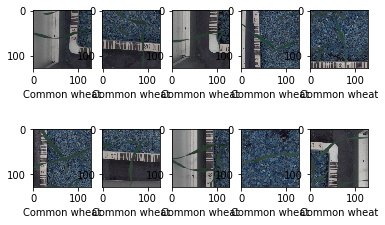

In [ ]:
# Plotting the graph for better understanding. 

print("Plotting the graph to check the Images.")

import matplotlib.pyplot as plt

for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_train1[i])
  plt.xlabel(y_train1[i])
  i += 1

In [ ]:
print(f"The shape of X_train is: {X_train1.shape}")

The shape of X_train is: (4750, 128, 128, 3)


In [ ]:
print(f"The shape of y_train is: {y_train1.shape}")

The shape of y_train is: (4750,)


In [ ]:
# Encoding.

from sklearn.preprocessing import LabelEncoder
print("Importing Label Encoder library so as to convert the categories into numbers.")

lenc = LabelEncoder()
print("Transforming y_train.")

y_train2 = lenc.fit_transform(y_train1)

%tensorflow_version 2.x
import tensorflow as tf
print("Transforming y_train to One Hot Encoding.")

y_train1 = tf.keras.utils.to_categorical(y_train2)

Importing Label Encoder library so as to convert the categories into numbers.
Transforming y_train.
TensorFlow 2.x selected.
Transforming y_train to One Hot Encoding.


In [ ]:
X_test = []
import cv2

for i in os.listdir('/content/drive/My Drive/plant-seedlings-classification/test'):
    dummy = cv2.imread('/content/drive/My Drive/plant-seedlings-classification/test/' + i)
    dummy = cv2.resize(dummy, (128,128))
    X_test.append(dummy)

In [ ]:
X_test1 = np.array(X_test)

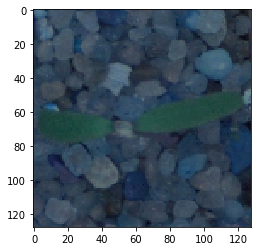

In [ ]:
plt.imshow(X_test[0])

In [ ]:
print("The datatype is: ",X_test1.dtype)
print("The shape is: ",X_test1.shape)

The datatype is:  uint8
The shape is:  (794, 128, 128, 3)


In [ ]:
# Importing necessary modules.

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
model = Sequential()

In [ ]:
# Building the model.

model.add(layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (128,128,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,kernel_size = (3,3), activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, kernel_size = (3,3),activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(80, activation = 'relu'))
model.add(layers.Dense(12, activation = 'softmax'))

# Compiling the model.

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Model Summary.

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 124, 124, 64)      256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 122, 128)     73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 476288)            0

In [ ]:
# Fitting the model.

model.fit(X_train1,y_train1,epochs = 100, batch_size = 32)

Train on 4750 samples
Epoch 1/100
4750/4750 [==============================] - 17s 4ms/sample - loss: 11.6605 - accuracy: 0.1587
Epoch 2/100
4750/4750 [==============================] - 9s 2ms/sample - loss: 2.0059 - accuracy: 0.3432
Epoch 3/100
4750/4750 [==============================] - 9s 2ms/sample - loss: 1.7737 - accuracy: 0.4105
Epoch 4/100
4750/4750 [==============================] - 9s 2ms/sample - loss: 1.5257 - accuracy: 0.4975
Epoch 5/100
4750/4750 [==============================] - 9s 2ms/sample - loss: 1.3511 - accuracy: 0.5587
Epoch 6/100
4750/4750 [==============================] - 9s 2ms/sample - loss: 1.1540 - accuracy: 0.6232
Epoch 7/100
4750/4750 [==============================] - 9s 2ms/sample - loss: 0.9915 - accuracy: 0.6800
Epoch 8/100
4750/4750 [==============================] - 9s 2ms/sample - loss: 0.9148 - accuracy: 0.7116
Epoch 9/100
4750/4750 [==============================] - 9s 2ms/sample - loss: 0.7775 - accuracy: 0.7501
Epoch 10/100
4750/4750 [=======

In [ ]:
# Evaluating loss and accuracy.

loss, acc = model.evaluate(X_train1,y_train1)

print(f"The accuracy achieved while training the model is {acc*100}% ")
print(f"The loss is reduced to {loss*100}% while training the model")


4750/4750 [==============================] - 3s 623us/sample - loss: 0.0029 - accuracy: 0.9987
The accuracy achieved while training the model is 99.87368583679199% 
The loss is reduced to 0.29088761245542% while training the model


In [ ]:
y_pred = model.predict(X_test1)

In [ ]:
output = []

for i in y_pred:
  output.append(np.argmax(i))
print(output)  

[6, 10, 6, 11, 3, 6, 1, 3, 3, 6, 6, 10, 3, 3, 10, 8, 6, 11, 8, 9, 6, 8, 3, 10, 8, 7, 9, 3, 3, 6, 6, 6, 6, 3, 9, 8, 0, 6, 3, 10, 6, 10, 6, 7, 5, 11, 8, 8, 7, 10, 3, 8, 6, 2, 6, 2, 10, 1, 5, 7, 11, 2, 1, 4, 3, 7, 6, 6, 8, 3, 6, 8, 10, 10, 3, 4, 6, 8, 6, 8, 11, 9, 11, 3, 3, 6, 2, 8, 6, 6, 3, 6, 5, 6, 1, 6, 7, 3, 6, 10, 5, 5, 8, 6, 6, 3, 11, 6, 1, 3, 8, 2, 2, 9, 9, 8, 2, 3, 3, 1, 3, 11, 2, 3, 6, 6, 1, 7, 5, 5, 1, 3, 11, 11, 3, 3, 6, 3, 0, 4, 6, 10, 3, 8, 3, 5, 3, 6, 1, 6, 10, 11, 7, 8, 6, 10, 3, 6, 10, 8, 1, 2, 6, 6, 8, 4, 8, 9, 3, 3, 9, 6, 6, 7, 9, 5, 3, 3, 6, 2, 10, 6, 0, 8, 8, 8, 6, 10, 5, 3, 6, 1, 6, 6, 1, 6, 6, 10, 1, 6, 3, 3, 1, 2, 6, 5, 3, 1, 5, 9, 6, 10, 1, 2, 0, 6, 10, 3, 8, 6, 7, 6, 3, 10, 4, 10, 3, 7, 10, 3, 5, 6, 2, 2, 3, 0, 6, 2, 10, 1, 10, 3, 11, 10, 7, 6, 5, 8, 10, 6, 3, 7, 6, 10, 3, 6, 3, 3, 2, 1, 6, 3, 3, 10, 6, 6, 10, 2, 3, 10, 1, 6, 8, 10, 3, 10, 6, 3, 6, 10, 6, 2, 3, 3, 6, 8, 3, 7, 7, 3, 6, 8, 6, 1, 11, 9, 3, 10, 6, 7, 10, 6, 2, 10, 11, 8, 4, 2, 6, 1, 9, 2, 11, 11, 6, 6

In [ ]:
output = lenc.inverse_transform(output)

In [ ]:
for i in os.listdir('/content/drive/My Drive/plant-seedlings-classification/test'):
    print(i)

003d61042.png
0021e90e4.png
02cfeb38d.png
007b3da8b.png
0086a6340.png
00d090cde.png
00c47e980.png
00ef713a8.png
03566743d.png
026716f9b.png
01291174f.png
03a2ee656.png
03e322a29.png
0625f063b.png
063363305.png
04814f36d.png
0437393b1.png
043449b0b.png
03ef36742.png
06d12f6fa.png
071cb3ece.png
05341a8a6.png
060450d79.png
060f1dc84.png
0751c0bbc.png
07e62f903.png
085974290.png
0885e7690.png
089ad62a7.png
08d591441.png
0ae6668fa.png
0bf7bfb05.png
0c27cf05f.png
0911d3dee.png
099b961ec.png
0ad9e7dfb.png
0a64e3e6c.png
0c4199daa.png
0c45ace27.png
0ebf8f2f4.png
0caeda5df.png
0d31e6602.png
0c5f6c493.png
0c51bf229.png
0d117d910.png
0dba99002.png
0ee4ad224.png
0e8492cb1.png
0f6cbe5e8.png
0fb233ad6.png
115f93ecc.png
116b136de.png
11d3f68ff.png
1364b297a.png
1376f3b63.png
1191ba346.png
1312065a5.png
126a71ce0.png
12625488b.png
122913909.png
13b9fa92d.png
1459e96a0.png
148bbda66.png
14bb43eee.png
172f9b10b.png
1541bdb2e.png
1623fb9e1.png
16357b436.png
17529c555.png
1758a1baf.png
16467a950.png
1694a7

In [ ]:
# Importing pandas.
# Creating a dataframe and exporting in the csv file format with images as well as labels columns.

import pandas as pd

results = {'Labels':output,'Images':i}
results = pd.DataFrame(results)

In [ ]:
# Checking the DatFrame.

results.head()

,Labels,Images
0,Loose Silky-bent,fea1d13d6.png
1,Small-flowered Cranesbill,fea1d13d6.png
2,Loose Silky-bent,fea1d13d6.png
3,Sugar beet,fea1d13d6.png
4,Common Chickweed,fea1d13d6.png


In [ ]:
# Exporting the Dataset to csv.

results.to_csv('results.csv')